$\begin{cases} 
(-k(x)u')' = f(x), \text{ dla } x \in (0,2) \\
u'(0) = g_0 \\
u(2) = u_1 \\
\end{cases}$ 
dla
$k(x) = \begin{cases} 1 &\text{dla } x \in [0,1) \\ 2 &\text{dla } x \in [1,2] \end{cases}$ 

In [14]:
#necessery imports
#numpy for numerical computing
#matplotlib for visialisations
import numpy as np
import matplotlib.pyplot as plt

Funkcja wyznaczająca rozwiązanie zadanego równania przy pomocy Metody Elementów Skończonych.

In [2]:
#Klasa rozwiązująca dane równanie przy pomocy Metody Elementów Skończonych.
#Autor Dawid Majchrowski IEIT
#Data 19.01.2019
class Mes:
    def __init__(self, f, N, g0, u1):
        self.f = f # f(x)
        self.N = N # 2N punktów siatki (Musi być parzysta ilośc, żeby wyliczyć całki analitycznie) 
        self.g0 = g0 # parametry g0 problemu brzegowego
        self.u1 = u1 # parametry u1 problemu brzegowego
        self.result = None 
    def mes(self,printA = False, printB = False, printResult = False):
        # Przedział [0,2] dzielimy na 2N równych części => długośc przedziału = 2/2N = 1/N
        h = 1 / N # Dlugość przedziału
        A = np.zeros((2*self.N, 2*self.N)) # Macierz układu rozmiaru (2N) x (2N) wypełniamy 0


        #Tworzymy macierz układu A
        A[0, 0] = 1 / h

        for i in range(1,self.N+1): # wierzsze (0-N-1)
            A[i,i] = 2/h
            A[i,i-1] = -1/h
            A[i-1,i] = -1/h 

        A[N,N] += 1/h # wiersz N

        for i in range(self.N+1,2*self.N): #wiersze (N+1,2N-1)
            A[i,i] = 4/h
            A[i,i-1] = -2/h
            A[i-1,i] = -2/h

        if(printA):
            print(A)

        #Tworzymy wektor B układu
        B = np.array([(4/3)*h*f(h*i) for i in range(2*self.N)]) # Wektor B

        # warunki brzegowe
        B[0] -= g0  
        B[2*self.N-1] = B[2*self.N-1] + 2*(self.u1*(1/h)) 

        if(printB):
            print(B)


        C = np.linalg.solve(A,B) # Rozwiazanie ukladu AC = B (C-> Wektor 2N wymiarowy)

        self.result = np.zeros(2*self.N+1) # Wektor 2N+1 wymiarowy reprezentujacy wynik 

        self.result[:2*self.N] = C[:] # Przepisujemy wartości C do wektora wynikowego

        self.result[2*self.N] = u1

        if(printResult):
            print(result)    

        return self.result # zwracamy resultat

    def plotMes(self):
        if(self.result is None):
            print('Use mes() method first')
        else:
            X = np.linspace(0,2,num=2*self.N+1)
            plt.plot(X,self.result)
            plt.show()

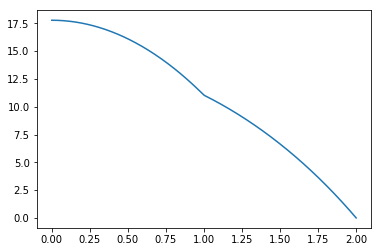

In [15]:
N = 1000
g0 = 0
u1 = 0
f = lambda x: x*x*x + 10
mesClass = Mes(f,N,g0,u1)
mesClass.mes()
mesClass.plotMes()